In [1]:
# Import the dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes in a list.
coordinates = list(lat_lngs)

In [4]:
# import the citipy module.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities=[]

#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

758

In [6]:
# Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for weather map API call.
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
from datetime import datetime

In [9]:
#Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 ==0 and i>=50):
        set_count += 1
        record_count = 1
        
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city
        
    #log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    #Add 1 to the record count.
    record_count += 1
        
    #Run an API request for each of the cities.
    try:
         #Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                             "Lat": city_lat,
                             "Lng": city_lng,
                             "Max Temp": city_max_temp,
                             "Humidity": city_humidity,
                             "Cloudiness": city_clouds,
                             "Wind Speed": city_wind,
                             "Country": city_country,
                             "Date": city_date})
        
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
#Indicate the Data Loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")       

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | berlevag
Processing Record 4 of Set 1 | severo-yeniseyskiy
Processing Record 5 of Set 1 | vanimo
Processing Record 6 of Set 1 | san carlos de bariloche
Processing Record 7 of Set 1 | grindavik
Processing Record 8 of Set 1 | mizdah
Processing Record 9 of Set 1 | fortuna
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | norman wells
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | hobyo
Processing Record 14 of Set 1 | deputatskiy
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | trairi
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | kropotkin
Processing Record 21 of Set 1 | kruisfontein
Processing Record 22 of Set 1 | matamoros
Processing Recor

Processing Record 39 of Set 4 | tiksi
Processing Record 40 of Set 4 | catamarca
Processing Record 41 of Set 4 | labuhan
Processing Record 42 of Set 4 | temaraia
City not found. Skipping...
Processing Record 43 of Set 4 | hidalgotitlan
Processing Record 44 of Set 4 | saint-pierre
Processing Record 45 of Set 4 | zharkent
Processing Record 46 of Set 4 | viligili
City not found. Skipping...
Processing Record 47 of Set 4 | saint george
Processing Record 48 of Set 4 | lano
Processing Record 49 of Set 4 | bonthe
Processing Record 50 of Set 4 | mackay
Processing Record 1 of Set 5 | adre
Processing Record 2 of Set 5 | vao
Processing Record 3 of Set 5 | veraval
Processing Record 4 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 5 | carutapera
Processing Record 6 of Set 5 | muravlenko
Processing Record 7 of Set 5 | lebu
Processing Record 8 of Set 5 | buritis
Processing Record 9 of Set 5 | upernavik
Processing Record 10 of Set 5 | yulara
Processing Record 11 of Set 5 

Processing Record 27 of Set 8 | beroroha
Processing Record 28 of Set 8 | tura
Processing Record 29 of Set 8 | palauig
Processing Record 30 of Set 8 | krasnokamsk
Processing Record 31 of Set 8 | toliary
City not found. Skipping...
Processing Record 32 of Set 8 | egvekinot
Processing Record 33 of Set 8 | lafiagi
Processing Record 34 of Set 8 | lata
Processing Record 35 of Set 8 | luderitz
Processing Record 36 of Set 8 | mitu
Processing Record 37 of Set 8 | moranbah
Processing Record 38 of Set 8 | morgan hill
Processing Record 39 of Set 8 | rivera
Processing Record 40 of Set 8 | hasaki
Processing Record 41 of Set 8 | walvis bay
Processing Record 42 of Set 8 | hit
Processing Record 43 of Set 8 | tokzar
City not found. Skipping...
Processing Record 44 of Set 8 | yar-sale
Processing Record 45 of Set 8 | kintampo
Processing Record 46 of Set 8 | alice springs
Processing Record 47 of Set 8 | soma
Processing Record 48 of Set 8 | aklavik
Processing Record 49 of Set 8 | coquimbo
Processing Record 

Processing Record 14 of Set 12 | arman
Processing Record 15 of Set 12 | harbour breton
Processing Record 16 of Set 12 | umm lajj
Processing Record 17 of Set 12 | vozhega
Processing Record 18 of Set 12 | astana
Processing Record 19 of Set 12 | huarmey
Processing Record 20 of Set 12 | fukue
Processing Record 21 of Set 12 | qandala
Processing Record 22 of Set 12 | oriximina
Processing Record 23 of Set 12 | obluche
City not found. Skipping...
Processing Record 24 of Set 12 | karema
Processing Record 25 of Set 12 | noumea
Processing Record 26 of Set 12 | rudnogorsk
Processing Record 27 of Set 12 | yeppoon
Processing Record 28 of Set 12 | bargarh
Processing Record 29 of Set 12 | key west
Processing Record 30 of Set 12 | griffith
Processing Record 31 of Set 12 | puri
Processing Record 32 of Set 12 | povenets
Processing Record 33 of Set 12 | tungkang
City not found. Skipping...
Processing Record 34 of Set 12 | bandarbeyla
Processing Record 35 of Set 12 | el alto
Processing Record 36 of Set 12 

Processing Record 47 of Set 15 | kimry
Processing Record 48 of Set 15 | hereford
Processing Record 49 of Set 15 | arteaga
Processing Record 50 of Set 15 | suntar
Processing Record 1 of Set 16 | bowen
Processing Record 2 of Set 16 | luancheng
Processing Record 3 of Set 16 | chalus
Processing Record 4 of Set 16 | kashi
Processing Record 5 of Set 16 | tokur
Processing Record 6 of Set 16 | dipkarpaz
City not found. Skipping...
Processing Record 7 of Set 16 | naze
Processing Record 8 of Set 16 | segezha
------------------------------
Data Retrieval Complete       
------------------------------


In [11]:
len(city_data)

692

In [12]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,80.87,73,100,16.44,MV,2022-08-01 02:11:08
1,Tuktoyaktuk,69.4541,-133.0374,49.42,78,98,13.71,CA,2022-08-01 02:11:09
2,Berlevag,70.8578,29.0864,57.20,92,92,2.59,NO,2022-08-01 02:11:09
3,Severo-Yeniseyskiy,60.3725,93.0408,52.57,76,100,6.17,RU,2022-08-01 02:11:10
4,Vanimo,-2.6741,141.3028,86.41,64,76,6.71,PG,2022-08-01 02:07:58
5,San Carlos De Bariloche,-41.1456,-71.3082,35.35,75,100,5.75,AR,2022-08-01 02:07:59
6,Grindavik,63.8424,-22.4338,48.67,87,20,12.66,IS,2022-08-01 02:11:10
7,Mizdah,31.4451,12.9801,73.69,54,1,2.44,LY,2022-08-01 02:11:10
8,Fortuna,40.5982,-124.1573,65.93,84,40,12.66,US,2022-08-01 02:11:11
9,Atuona,-9.8000,-139.0333,77.23,71,12,12.08,PF,2022-08-01 02:11:11


In [13]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2022-08-01 02:11:08,-0.6000,73.0833,80.87,73,100,16.44
1,Tuktoyaktuk,CA,2022-08-01 02:11:09,69.4541,-133.0374,49.42,78,98,13.71
2,Berlevag,NO,2022-08-01 02:11:09,70.8578,29.0864,57.20,92,92,2.59
3,Severo-Yeniseyskiy,RU,2022-08-01 02:11:10,60.3725,93.0408,52.57,76,100,6.17
4,Vanimo,PG,2022-08-01 02:07:58,-2.6741,141.3028,86.41,64,76,6.71
5,San Carlos De Bariloche,AR,2022-08-01 02:07:59,-41.1456,-71.3082,35.35,75,100,5.75
6,Grindavik,IS,2022-08-01 02:11:10,63.8424,-22.4338,48.67,87,20,12.66
7,Mizdah,LY,2022-08-01 02:11:10,31.4451,12.9801,73.69,54,1,2.44
8,Fortuna,US,2022-08-01 02:11:11,40.5982,-124.1573,65.93,84,40,12.66
9,Atuona,PF,2022-08-01 02:11:11,-9.8000,-139.0333,77.23,71,12,12.08


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [15]:
#Extract relevant fields from the dataframe for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
#Import the time module.
import time

# Get today's date.
today = time.strftime("%x")
today

'07/31/22'

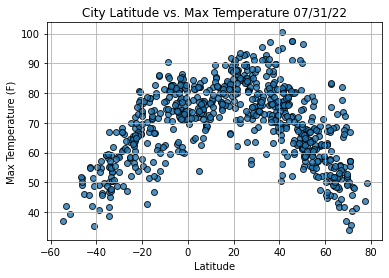

In [17]:
#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Max Temperature " + time.strftime("%x") )
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

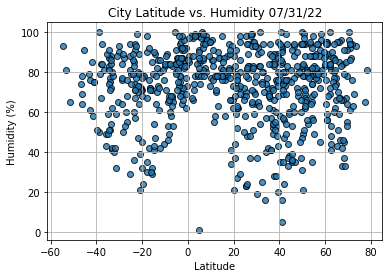

In [18]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Humidity " + time.strftime("%x") )
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

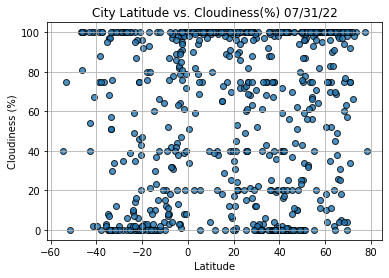

In [19]:
#Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Cloudiness(%) " + time.strftime("%x") )
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

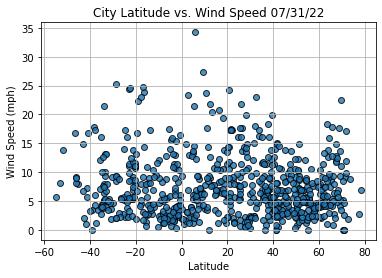

In [20]:
#Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x") )
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()

In [21]:
#Import linear regression from the Scipy stats module.
from scipy.stats import linregress

In [22]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [23]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [24]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

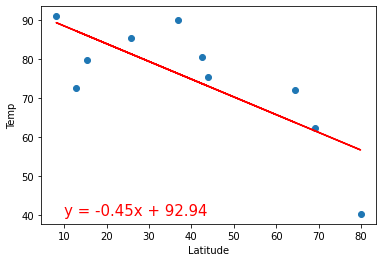

In [25]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [26]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

NameError: name 'x_values' is not defined

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
index13 = city_data_df.loc[13]
index13

City                  Deputatskiy
Country                        RU
Date          2022-08-01 02:11:13
Lat                          69.3
Lng                         139.9
Max Temp                    68.72
Humidity                       67
Cloudiness                    100
Wind Speed                   4.21
Name: 13, dtype: object

In [29]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
687     True
688     True
689     True
690     True
691     True
Name: Lat, Length: 692, dtype: bool

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Tuktoyaktuk,CA,2022-08-01 02:11:09,69.4541,-133.0374,49.42,78,98,13.71
2,Berlevag,NO,2022-08-01 02:11:09,70.8578,29.0864,57.20,92,92,2.59
3,Severo-Yeniseyskiy,RU,2022-08-01 02:11:10,60.3725,93.0408,52.57,76,100,6.17
6,Grindavik,IS,2022-08-01 02:11:10,63.8424,-22.4338,48.67,87,20,12.66
7,Mizdah,LY,2022-08-01 02:11:10,31.4451,12.9801,73.69,54,1,2.44


In [31]:
# Create Northern and Southern Hemisphere dataframes.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

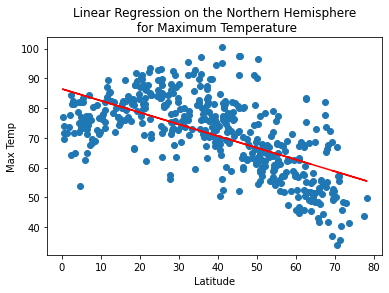

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Save the figure.
plt.savefig("weather_data/Fig5.png")

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for Maximum Temperature", "Max Temp", (10,-20))

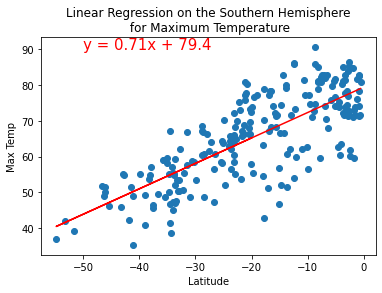

In [41]:
#Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Save the figure.
plt.savefig("weather_data/Fig6.png")

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for Maximum Temperature", "Max Temp", (-50,90))

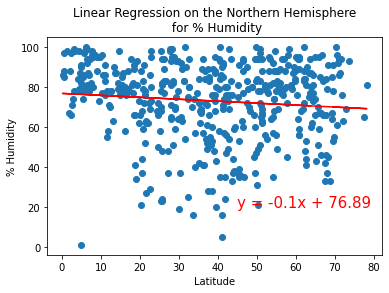

In [42]:
#linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Save the figure.
plt.savefig("weather_data/Fig7.png")

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for % Humidity", "% Humidity", (45,20))

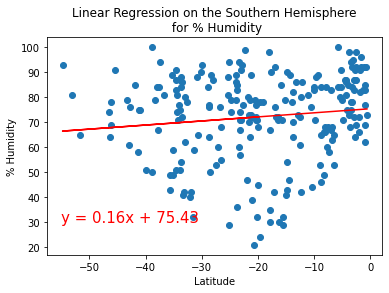

In [43]:
#Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Save the figure.
plt.savefig("weather_data/Fig8.png")

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for % Humidity", "% Humidity", (-55,30))

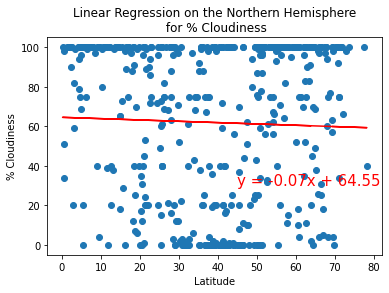

In [44]:
#linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Save the figure.
plt.savefig("weather_data/Fig9.png")

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for % Cloudiness", "% Cloudiness", (45,30))

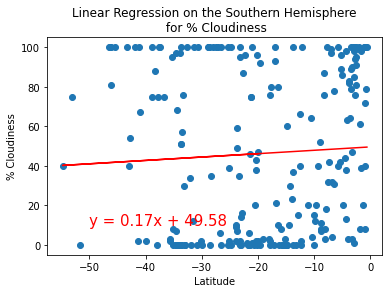

In [45]:
#Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Save the figure.
plt.savefig("weather_data/Fig10.png")

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for % Cloudiness", "% Cloudiness", (-50,10))

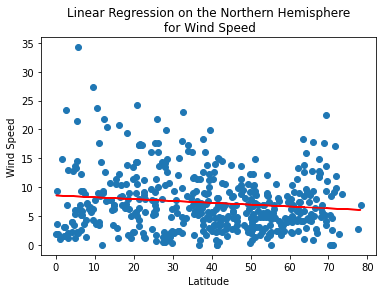

In [46]:
#linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Save the figure.
plt.savefig("weather_data/Fig11.png")

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for Wind Speed", "Wind Speed", (10,60))

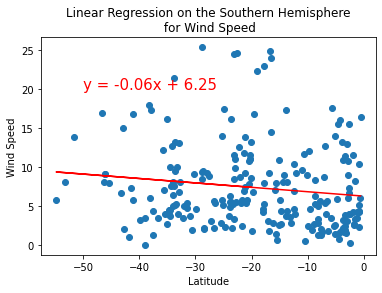

<Figure size 432x288 with 0 Axes>

In [49]:
#Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for Wind Speed", "Wind Speed", (-50,20))

#Save the figure.
plt.savefig("weather_data/Fig12.png")